In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import os
import sys

module_path = os.path.abspath(os.path.join("../.."))
if module_path not in sys.path:
    sys.path.append(module_path)

from data_pipeline.config import settings
from data_pipeline.etl.sources.geo_utils import add_tracts_for_geometries, get_tract_geojson


In [2]:
%load_ext lab_black

In [3]:
df = get_tract_geojson()

2022-08-17 11:45:46,587 [data_pipeline.etl.sources.geo_utils] INFO     Loading tract geometry data from census ETL
2022-08-17 11:45:46,588 [data_pipeline.etl.sources.geo_utils] DEBUG    Loading existing tract geojson


In [4]:
center = "6030.04"
center_GEOID10_TRACT = "24027603004"

In [5]:
df_subset = df.query(
    'STATEFP10=="24" and COUNTYFP10=="027" and NAME10 in ["6030.03", "6051.04", "6055.02", "6055.03", "6023.03", "6022.01", "6030.01", "6022.01", "6021", "6030.04"]'
)
df_subset

STATEFP10 COUNTYFP10 TRACTCE10 GEOID10_TRACT   NAME10  \
53415        24        027    602100   24027602100     6021   
53416        24        027    602303   24027602303  6023.03   
53424        24        027    605503   24027605503  6055.03   
53429        24        027    605502   24027605502  6055.02   
53452        24        027    603004   24027603004  6030.04   
53453        24        027    605104   24027605104  6051.04   
53454        24        027    603003   24027603003  6030.03   
53455        24        027    603001   24027603001  6030.01   
53464        24        027    602201   24027602201  6022.01   

                 NAMELSAD10 MTFCC10 FUNCSTAT10   ALAND10  AWATER10  \
53415     Census Tract 6021   G5020          S  13769934      3674   
53416  Census Tract 6023.03   G5020          S  11740756     26901   
53424  Census Tract 6055.03   G5020          S   3158645      8444   
53429  Census Tract 6055.02   G5020          S   5260984     16405   
53452  Census Tract 6030.04   G5020          S  44425097     99882   
53453  Census Tract 6051.04   G5020          S  39969526   1553493   
53454  Census Tract 6030.03   G5020          S  45161338    174904   
53455  Census Tract 6030.01   G5020          S  24726303     57708   
53464  Census Tract 6022.01   G5020          S   4611549      6125   

        INTPTLAT10    INTPTLON10  \
53415  +39.3076905  -076.8349752   
53416  +39.2600506  -076.8754102   
53424  +39.2274469  -076.8803625   
53429  +39.2257617  -076.9054701   
53452  +39.2817022  -076.9188315   
53453  +39.2369323  -076.9735549   
53454  +39.3192333  -076.9680454   
53455  +39.3279761  -076.8942412   
53464  +39.2900228  -076.8721238   

                                                geometry  
53415  POLYGON ((-76.86305 39.31484, -76.86308 39.315...  
53416  POLYGON ((-76.86750 39.25170, -76.86754 39.251...  
53424  POLYGON ((-76.88405 39.23543, -76.88398 39.235...  
53429  POLYGON ((-76.90881 39.21739, -76.90882 39.217...  
53452  POLYGON ((-76.98539 39.26610, -76.98557 39.266...  
53453  POLYGON ((-76.97979 39.23322, -76.98018 39.233...  
53454  POLYGON ((-76.93350 39.35760, -76.93341 39.357...  
53455  POLYGON ((-76.86308 39.31501, -76.86305 39.314...  
53464  POLYGON ((-76.87750 39.30290, -76.87747 39.302...

<AxesSubplot:>

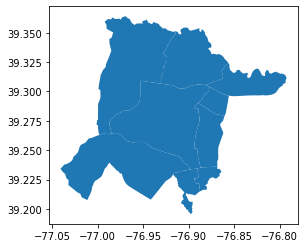

In [6]:
df_subset.plot()

In [7]:
tract_subset = df_subset.copy()

In [8]:
df_subset = df_subset[["GEOID10_TRACT", "geometry"]].copy()

In [9]:
np.random.choice([True, False], len(df_subset))

array([False, False,  True,  True, False, False, False,  True,  True])

In [10]:
df_subset_scores = df_subset.copy()
# df_subset_scores["included"] = np.random.choice([True, False], len(df_subset))
df_subset_scores["included"] = True
df_subset_scores.loc[df.GEOID10_TRACT == "24027603004", "included"] = False

In [11]:
tract_data = df_subset.rename(columns={"GEOID10_TRACT": "ORIGINAL_TRACT"})

In [12]:
df = df_subset_scores

In [13]:
df

GEOID10_TRACT                                           geometry  \
53415   24027602100  POLYGON ((-76.86305 39.31484, -76.86308 39.315...   
53416   24027602303  POLYGON ((-76.86750 39.25170, -76.86754 39.251...   
53424   24027605503  POLYGON ((-76.88405 39.23543, -76.88398 39.235...   
53429   24027605502  POLYGON ((-76.90881 39.21739, -76.90882 39.217...   
53452   24027603004  POLYGON ((-76.98539 39.26610, -76.98557 39.266...   
53453   24027605104  POLYGON ((-76.97979 39.23322, -76.98018 39.233...   
53454   24027603003  POLYGON ((-76.93350 39.35760, -76.93341 39.357...   
53455   24027603001  POLYGON ((-76.86308 39.31501, -76.86305 39.314...   
53464   24027602201  POLYGON ((-76.87750 39.30290, -76.87747 39.302...   

       included  
53415      True  
53416      True  
53424      True  
53429      True  
53452     False  
53453      True  
53454      True  
53455      True  
53464      True

In [14]:
adjacent_tracts: gpd.GeoDataFrame = df.sjoin(
    tract_data, how="left", predicate="touches"
)

In [15]:
adjacent_tracts.groupby("ORIGINAL_TRACT")[["included"]].mean().reset_index().rename(
    columns={"ORIGINAL_TRACT": "GEOID10_TRACT"}
)

GEOID10_TRACT  included
0   24027602100  0.666667
1   24027602201  0.666667
2   24027602303  0.666667
3   24027603001  0.666667
4   24027603003  0.666667
5   24027603004  1.000000
6   24027605104  0.666667
7   24027605502  0.666667
8   24027605503  0.666667

# Make test data

In [18]:
tract_subset.to_file("../tests/score/test_utils/data/us.geojson", index=False)

In [21]:
df[["GEOID10_TRACT", "included"]].to_csv(
    "../tests/score/test_utils/data/scores.csv", index=False
)